In [1]:
import tensorflow as tf
import graphgallery 
import matplotlib.pyplot as plt


# Set if memory growth should be enabled for ALL `PhysicalDevice`.
graphgallery.set_memory_growth()

1 Physical GPUs, 1 Logical GPUs


In [2]:
tf.__version__

'2.1.2'

In [3]:
graphgallery.__version__

'0.5.0'

# Load the Datasets
+ cora
+ citeseer
+ pubmed

In [4]:
from graphgallery.data import Planetoid

# set `verbose=False` to avoid these printed tables
data = Planetoid('cora', root="~/GraphData/datasets/", verbose=False)
graph = data.graph
idx_train, idx_val, idx_test = data.split_nodes()


In [5]:
data.supported_datasets

{'citeseer', 'cora', 'pubmed'}

In [6]:
from graphgallery.nn.gallery import DAGNN
model = DAGNN(graph, K=10, attr_transform="normalize_attr", device='GPU', seed=123)
model.build()
# train with validation
his = model.train(idx_train, idx_val, verbose=1, epochs=100)
# train without validation
# his = model.train(idx_train, verbose=1, epochs=100)
loss, accuracy = model.test(idx_test)
print(f'Test loss {loss:.5}, Test accuracy {accuracy:.2%}')


Training...
100/100 [==============================] - 2s 23ms/step - loss: 1.3589 - acc: 0.8500 - val_loss: 1.6401 - val_acc: 0.7860 - time: 2.3016
Testing...
1/1 [==============================] - 0s 94ms/step - test_loss: 1.5903 - test_acc: 0.8390 - time: 0.0943
Test loss 1.5903, Test accuracy 83.90%


## Show model summary

In [7]:
model.summary()

Model: "dagnn"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
attr_matrix (InputLayer)        [(None, 1433)]       0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 64)           91712       attr_matrix[0][0]                
__________________________________________________________________________________________________
dropout (Dropout)               (None, 64)           0           dense[0][0]                      
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 7)            448         dropout[0][0]                    
______________________________________________________________________________________________

## Visualization Training 

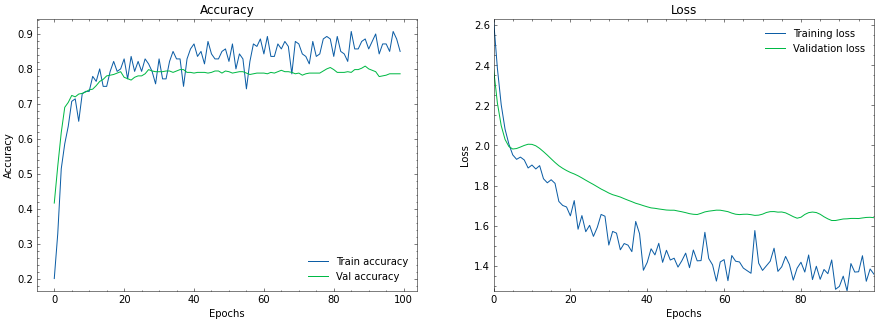

In [8]:
import matplotlib.pyplot as plt
with plt.style.context(['science', 'no-latex']):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    axes[0].plot(his.history['acc'], label='Train accuracy')
    axes[0].plot(his.history['val_acc'], label='Val accuracy')
    axes[0].legend()
    axes[0].set_title('Accuracy')
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Accuracy')


    axes[1].plot(his.history['loss'], label='Training loss')
    axes[1].plot(his.history['val_loss'], label='Validation loss')
    axes[1].legend()
    axes[1].set_title('Loss')
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('Loss')
    
    plt.autoscale(tight=True)
    plt.show()    